# importing necessary libraries and reading the data

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('honeyproduction.csv')

In [4]:
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [5]:
df.tail()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
621,VA,4000.0,41,164000.0,23000.0,3.77,618000.0,2012
622,WA,62000.0,41,2542000.0,1017000.0,2.38,6050000.0,2012
623,WV,6000.0,48,288000.0,95000.0,2.91,838000.0,2012
624,WI,60000.0,69,4140000.0,1863000.0,2.05,8487000.0,2012
625,WY,50000.0,51,2550000.0,459000.0,1.87,4769000.0,2012


In [6]:
df.isna().sum()

state          0
numcol         0
yieldpercol    0
totalprod      0
stocks         0
priceperlb     0
prodvalue      0
year           0
dtype: int64

# Percentage distribution of data using piechart

In [10]:
df['year'].unique()

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012], dtype=int64)

<Figure size 2880x2880 with 0 Axes>

<Figure size 2880x2880 with 0 Axes>

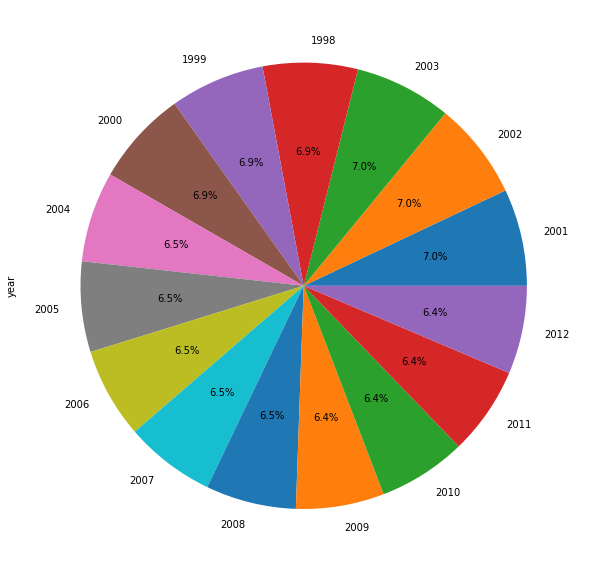

In [29]:
plt.figure(figsize=(10,20))
df['year'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

# Distribution of the data based on the column - priceperlb

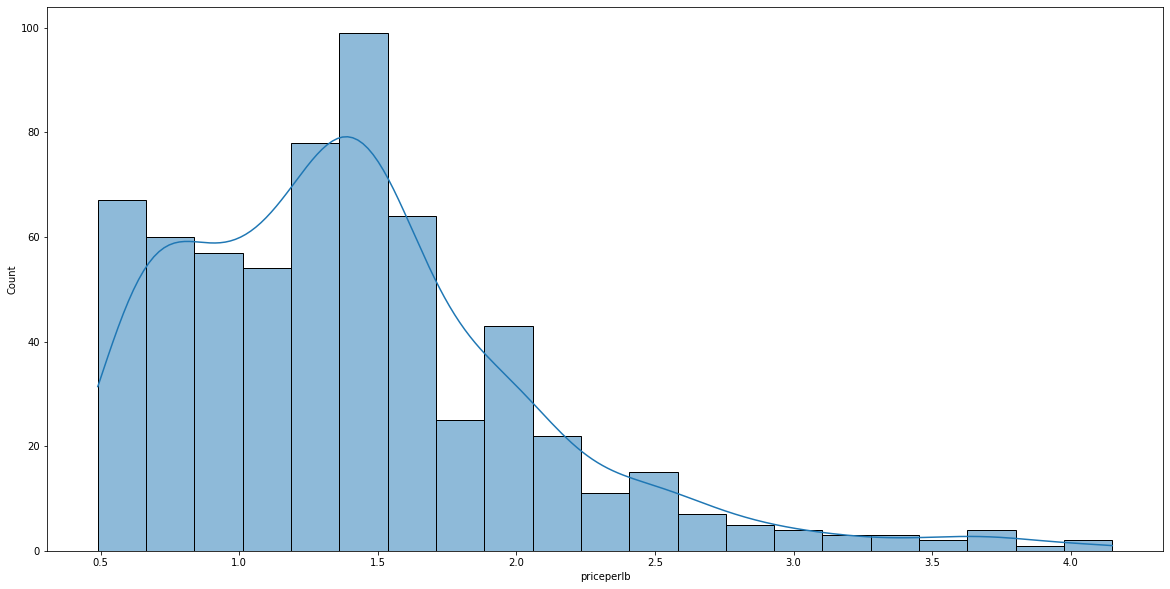

In [40]:
plt.figure(figsize=(20,10))
sns.histplot(df['priceperlb'],kde=True)
plt.show()

In [34]:
df['priceperlb'].value_counts()

1.41    10
1.42    10
0.65     9
1.40     9
0.72     9
        ..
1.76     1
2.42     1
2.18     1
2.44     1
2.91     1
Name: priceperlb, Length: 210, dtype: int64

In [35]:
df['priceperlb'].describe()

count    626.000000
mean       1.409569
std        0.638599
min        0.490000
25%        0.932500
50%        1.360000
75%        1.680000
max        4.150000
Name: priceperlb, dtype: float64

From the above observations ,we could see that the data is positively skewed and most of the data having priceperlb value within the range 1 dollar to 2 dollars.The mean value is 1.40 dollars and the maximum and minimum value is 4.15 dollars and 0.49 dollars respectively.

# Scatterplot between the columns - numcol and prodval

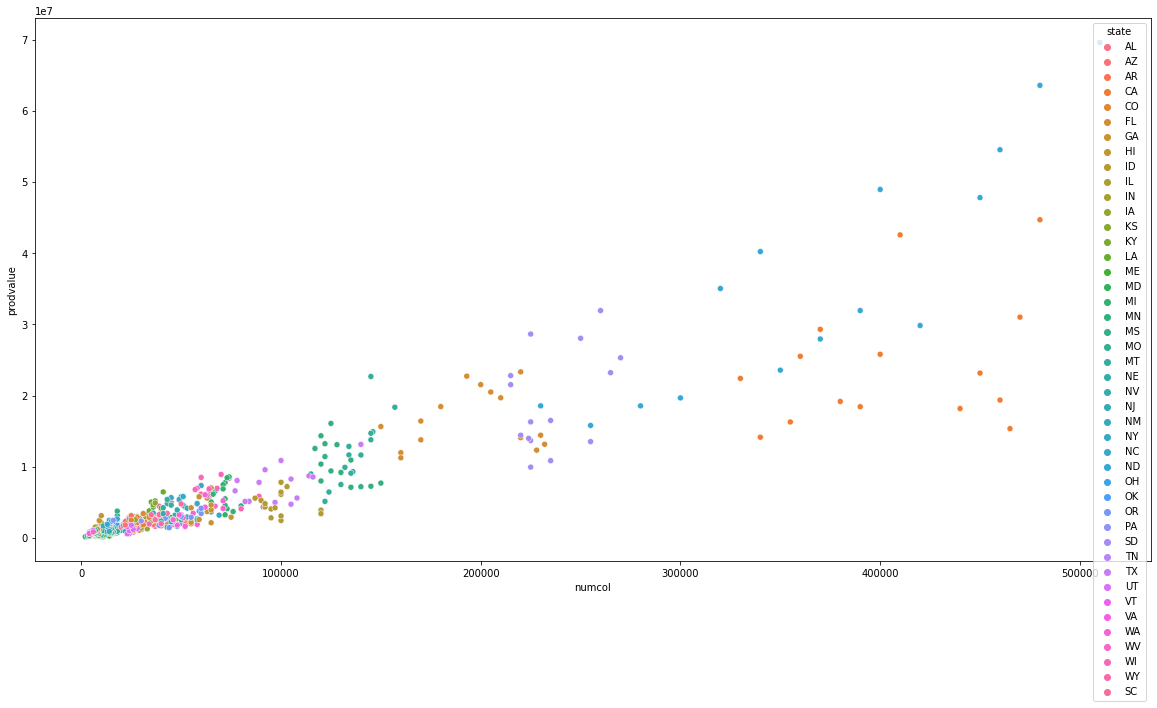

In [47]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=df,x='numcol',y='prodvalue',hue='state')
plt.show()

From the above observation ,we could see as the number of colonies increases in each state,the production value also increases linearly.Hence ,there is an positive linear relationship between numcol column and prodvalue column i.e. when the number of colonies increases ,the production value also increases.

# boxplot - Year and prodvalue

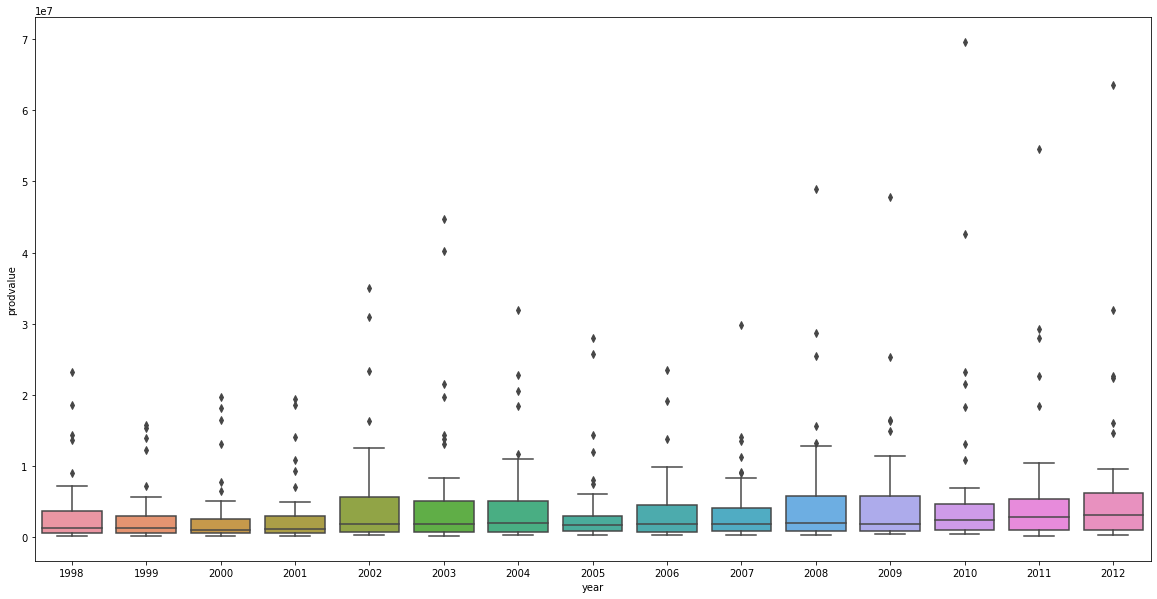

In [51]:
plt.figure(figsize=(20,10))
sns.boxplot(df,x='year',y='prodvalue')
plt.show()

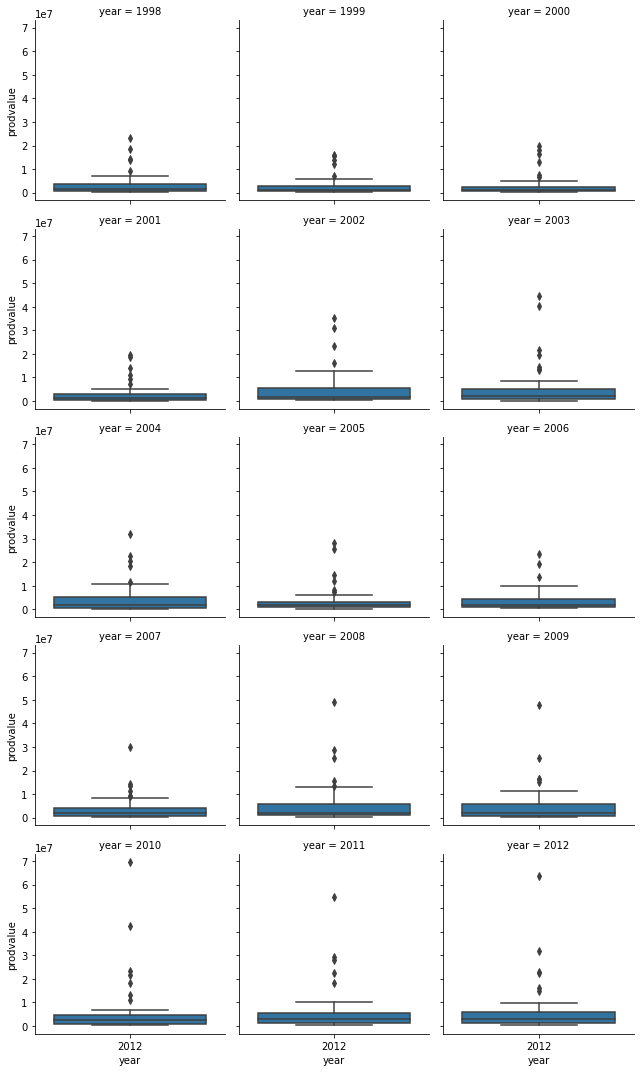

In [55]:
ax=sns.FacetGrid(data=df,col='year',col_wrap=3)
ax.map(sns.boxplot,'year','prodvalue')

From the above observations,we could infer that from the perspective of each year ,all the records skewed towards right and we could see many outliers for each year and the maximum production value is seen in the year 2002 and 2008

# pairplot

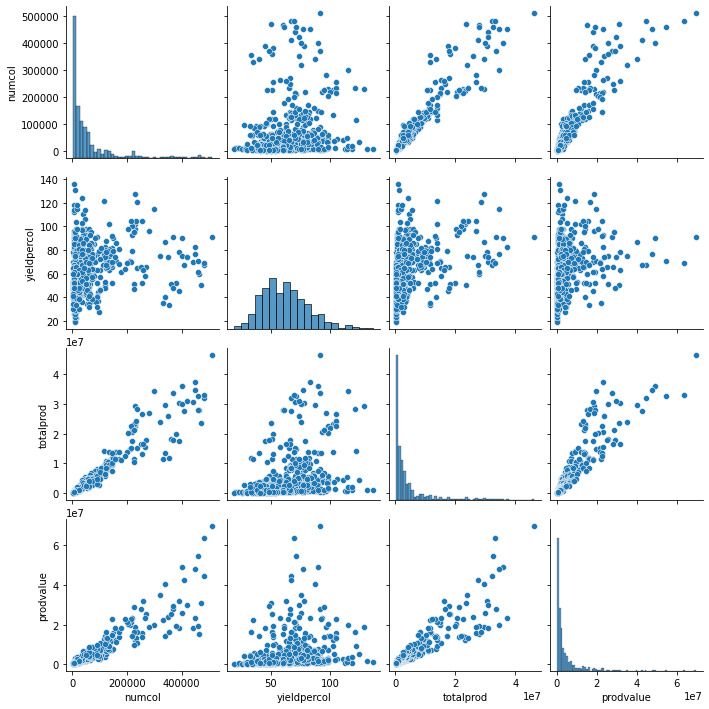

In [63]:
sns.pairplot(df[['numcol','yieldpercol','totalprod','prodvalue']])
plt.show()

In [59]:
df['year'].unique()

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012], dtype=int64)

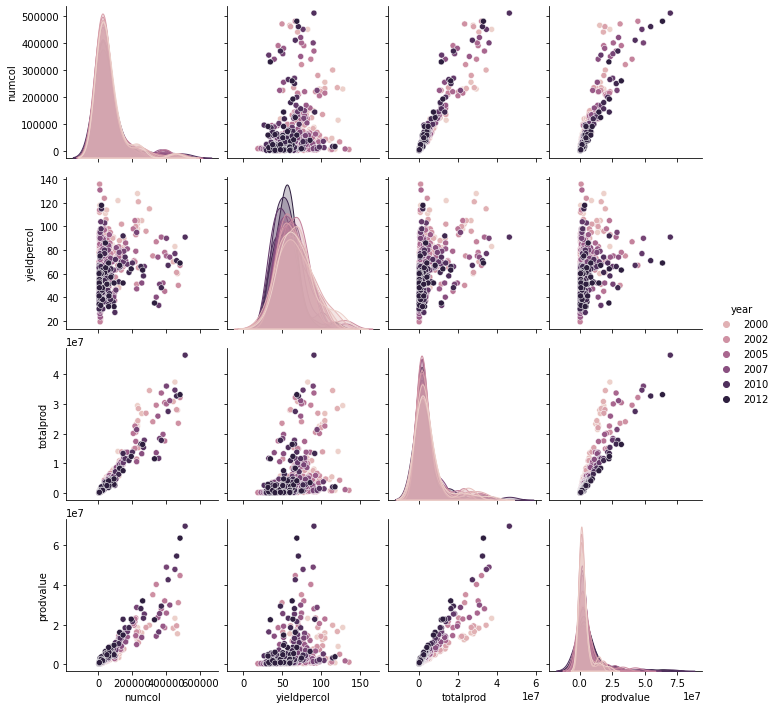

In [64]:
sns.pairplot(df[['numcol','yieldpercol','totalprod','prodvalue','year']],hue='year')
plt.show()

From the above observations,we could see that there is an linear relationship or positive correlation between the following pairs

1. numcol vs totalprod
2. numcol vs prodvalue
3. prodvalue vs totalprod

# correlation 

In [67]:
c=df[['numcol','yieldpercol','totalprod','stocks','priceperlb','prodvalue']]
c.corr()

,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue
numcol,1.000000,0.243515,0.953594,0.825929,-0.232701,0.912796
yieldpercol,0.243515,1.000000,0.396252,0.367812,-0.358646,0.278977
totalprod,0.953594,0.396252,1.000000,0.878830,-0.264499,0.907236
stocks,0.825929,0.367812,0.878830,1.000000,-0.305867,0.728560
priceperlb,-0.232701,-0.358646,-0.264499,-0.305867,1.000000,-0.089567
prodvalue,0.912796,0.278977,0.907236,0.728560,-0.089567,1.000000


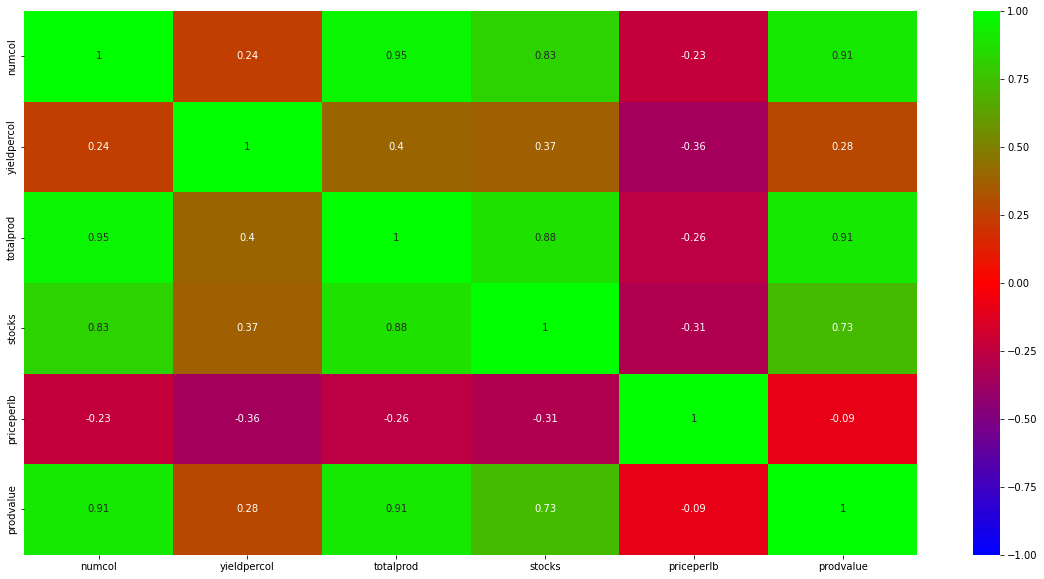

In [69]:
plt.figure(figsize=(20,10))
sns.heatmap(c.corr(),annot=True,vmax=1,vmin=-1,cmap='brg')
plt.show()

From the above observation ,we could see the positive and negative correlated pairs using the heatmap function of Seaborn.The following are the top three positive correlated pairs which has positive linear relationship.

1. numcol vs totalprod (+0.95)
2. numcol vs prodvalue (+0.91)
3. prodvalue vs totalprod (+0.91)

The following are top three negatively correlated pairs which has negative linear relationship.

1. priceperlb vs yieldpercol (-0.36)
2. stocks vs priceperlb      (-0.31)
3. priceperlb vs totalprod   (-0.26)